In [1]:
import tensorflow as tf 
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# custom
from utils.utils import load_local_dataset_train_test, load_local_dataset, load_local_dataset_tf, preprocess_data_per_tfmodel
from utils.constants import SOURCE_DATASETS, TARGET_DATASETS


In [2]:

TARGET_SIZE = (300, 300)
# BATCH_SIZE = 128
BATCH_SIZE = 8


path = "/Users/felixgerschner/git/ai-prototype/data/target/mechanicalseals_fulllight"
# path = "/Users/felixgerschner/git/ai-prototype/data/source/miniimagenet"
# path = "/Users/felixgerschner/git/ai-prototype/data/source/dagm"
# path = "/Users/felixgerschner/git/ai-prototype/data/source/caltech101"


train = load_local_dataset_tf(path, target_size=TARGET_SIZE, subset="training",batch_size=1)
test = load_local_dataset_tf(path, target_size=TARGET_SIZE, subset="test", batch_size=1)

# X, y = load_local_dataset(path, ".png", target_size=TARGET_SIZE)

print("batches: ", test.cardinality().numpy(), " ", type(test.cardinality().numpy()))

Found 181 files belonging to 2 classes.
Using 145 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Found 181 files belonging to 2 classes.
Using 36 files for validation.
batches:  36   <class 'numpy.int64'>


2023-02-05 20:58:50.939499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-05 20:58:50.939651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [4]:
import numpy as np

# X = keras.applications.vgg16.preprocess_input(dataset[0])

train_preprocessed = preprocess_data_per_tfmodel(train)
test_preprocessed = preprocess_data_per_tfmodel(test)

classes = train.class_names


# this could also be the output a different Keras model or layer
# input_tensor = keras.layers.Input(shape=(224, 224, 3), name="put it in")

base_model = keras.applications.VGG16(
            weights="imagenet",
            input_shape=(*TARGET_SIZE, 3),
            include_top=False,
        )

for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.Dense(32, activation="relu")(x)

out = keras.layers.Dense(len(classes), activation="softmax", name="predictions")(x)

model = keras.models.Model(
            inputs=base_model.input, 
            outputs=out)

optimizer = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer = optimizer,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)




# images, labels = next(iter(train_preprocessed))

# x_image, y_image = X[0], y[0]


# print(y_image)
# plt.imshow(x_image.astype("uint8"))
# plt.axis("off")

# x_image = np.expand_dims(x_image, axis=0)
# images = np.expand_dims(images, axis=0)

# print(images.shape, " ", labels.shape)

# plt.imshow(images.numpy().astype("uint8"))

# _image = image.img_to_array(images)

# print(_image.shape)

# y_pred = model.predict(images)

# print(labels)
# print(np.argmax(y_pred))

model.summary()

# model.predict(images)

# y_pred = model.predict(images)
# print(y_pred)

# for image, label in preprocessed.take(1):
#     print("Label: ", label.numpy())
#     print("Image shape: ", image.numpy().shape)
#     plt.imshow(image.numpy().astype("uint8"))
#     plt.axis("off")
# import time

# start_time = time.perf_counter()
# for epoch_num in range(2):
#     for sample in dataset:
#         # Performing a training step
#         time.sleep(0.01)
# print("Execution time:", time.perf_counter() - start_time)
    
#     print(type(images[0]))
#     image = keras.applications.vgg16.preprocess_input(images[1])
#     print(type(image))
    


# keras.applications.vgg16.preprocess_input(X_train)


# path = "/Users/felixgerschner/git/ai-prototype/data/source/caltech101"
# load_local_dataset_tf(path, target_size=TARGET_SIZE)


# class_names = data.class_names
# print(class_names)

# for images, labels in data.take(1):
#     print(images.shape, " ", labels.shape)
 
#     print(labels[0])
#     plt.imshow(images[10].numpy().astype("uint8"))
#     plt.axis("off")


# X, y = load_local_dataset(path, img_format, target_size=TARGET_SIZE)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [29]:
one_shot_train = train.take(5)
one_shot_train = train_preprocessed.take(5)
# one_shot_train = one_shot_train.map(lambda x, y: (tf.expand_dims(x, axis=0), y))

one_shot_train.cardinality().numpy()

5

In [6]:
# list(train.as_numpy_iterator())
test

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [7]:
hist = model.fit(
        one_shot_train,
        epochs=2,
        validation_data=test,
        verbose=True,
    )

print(hist.history)

Epoch 1/2


2023-02-05 20:58:51.974177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-05 20:58:52.233720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 6.2432 - accuracy: 0.4000   

2023-02-05 20:58:53.141689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 389ms/step - loss: 6.2432 - accuracy: 0.4000 - val_loss: 0.3424 - val_accuracy: 0.9444
Epoch 2/2
5/5 [==============================] - 2s 406ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2214 - val_accuracy: 0.9444
{'loss': [6.243218421936035, 0.03231102600693703], 'accuracy': [0.4000000059604645, 1.0], 'val_loss': [0.3424261212348938, 0.22135107219219208], 'val_accuracy': [0.944444477558136, 0.944444477558136]}


In [8]:
for layer in model.layers:
    print(layer.name, " ", layer.trainable)

input_1   False
block1_conv1   False
block1_conv2   False
block1_pool   False
block2_conv1   False
block2_conv2   False
block2_pool   False
block3_conv1   False
block3_conv2   False
block3_conv3   False
block3_pool   False
block4_conv1   False
block4_conv2   False
block4_conv3   False
block4_pool   False
block5_conv1   False
block5_conv2   False
block5_conv3   False
block5_pool   False
flatten   True
dense   True
dense_1   True
predictions   True


In [9]:
model.layers[-4].name

test_input = test_preprocessed.take(1)

model.predict(test_input)

2023-02-05 20:58:56.446229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 332ms/step


array([[9.9999702e-01, 2.9455446e-06]], dtype=float32)

In [10]:
from sklearn.metrics import accuracy_score

image, label = next(iter(test_preprocessed))

y_pred = model.predict(np.expand_dims(image[0], axis=0))


pred = np.argmax(y_pred, axis=1)


acc = accuracy_score([1], pred)
print(acc)

print(np.argmax(label, axis=1))
print(pred)
print(image[0].shape)
print(len(image[0].shape))
print(y_pred)
classes

1/1 [==============================] - 0s 197ms/step
1.0
[1]
[1]
(300, 300, 3)
3
[[1.3821887e-05 9.9998617e-01]]


2023-02-05 20:58:57.282798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


['damaged', 'undamaged']

(-0.5, 299.5, 299.5, -0.5)

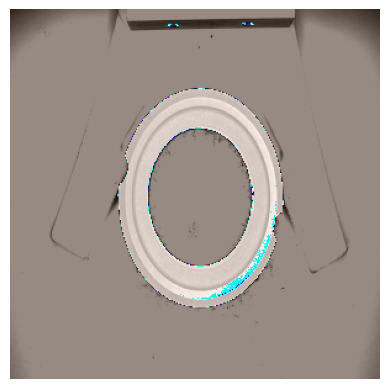

In [11]:
plt.imshow(image[0].numpy().astype("uint8"))
plt.axis("off")

In [12]:
y = np.concatenate([y for x, y in test_preprocessed], axis=0)

print(y)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [13]:
# data = tf.keras.utils.image_dataset_from_directory(
#   path,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=TARGET_SIZE,
#   batch_size=BATCH_SIZE,
#   interpolation="area"
# )


# for images, labels in data.take(1):
#     print(images.shape, " ", labels.shape)
 
#     print(labels[1])
#     plt.imshow(images[0].numpy().astype("uint8"))
#     plt.axis("off")


In [14]:
# plt.imshow(X[4].astype("uint8"))
# plt.axis("off")
# X[4].shape

In [15]:
# from models.tf_models.VGG16_model import VGG16_model


# model = VGG16_model("imagenet", input_shape=(350, 350, 3), 
#                 num_classes=2, build_pre_model=True)

# model.fit_and_save_pre_model(X, y)

In [16]:
# from models.tf_models.ResNet101_model import ResNet101_model


# model = ResNet101_model("imagenet", input_shape=(350, 350, 3), 
#                 num_classes=2, build_pre_model=True)

# model.fit_and_save_pre_model(X, y)

In [17]:
# from models.tf_models.DenseNet121_model import DenseNet121_model


# model = DenseNet121_model("imagenet", input_shape=(350, 350, 3), 
#                 num_classes=2, build_pre_model=True)

# model.fit_and_save_pre_model(X, y)

In [18]:
# from models.tf_models.MobileNet_model import MobileNet_model


# model = MobileNet_model("mechanicalseal_fulllight", input_shape=(350, 350, 3), 
#                 num_classes=2, build_pre_model=True)

# model.fit_and_save_pre_model(X, y)

In [19]:
# import matplotlib.pyplot as plt

# plt.imshow(X[2], cmap="binary")
# plt.show()

In [20]:
# from tensorflow.keras.applications.vgg16 import VGG16

# model = VGG16(weights="imagenet", include_top=True)

# model.summary()

In [21]:
# import tensorflow as tf 


# from sklearn.model_selection import train_test_split

# # custom
# from utils.utils import load_local_dataset, load_local_dataset_train_test, preload_from_directory_old

# path = "/Users/felixgerschner/git/ai-prototype/data/source/miniimagenet" # CRASHES KERNEL
# path = "/Users/felixgerschner/git/ai-prototype/data/source/caltech101" # Works
# path = "/Users/felixgerschner/git/ai-prototype/data/source/dagm" # Works
# path = "/Users/felixgerschner/git/ai-prototype/data/target/mechanicalseals_fulllight" # Works

# X, y = load_local_dataset(path, ".JPEG", input_shape=None) # CRASHES KERNEL
# X, y = load_local_dataset(path, ".jpg", input_shape=(350, 350))
# X, y = load_local_dataset(path, ".PNG", input_shape=(350, 350))
# X, y = load_local_dataset(path, ".png", input_shape=(350, 350))
# X_train, y_train, X_test, y_test = load_local_dataset_train_test(path, ".png", input_shape=(350, 350))



In [22]:
# X.shape
# X_train.shape, " ", X_test.shape

In [23]:
# import matplotlib.pyplot as plt

# plt.imshow(X[2523].astype("uint8"))
# plt.show()
# y[2523]

In [24]:
import pandas as pd


df = pd.DataFrame(columns=["a", "b", "c"], data=[[1, 2, 3]])
print(df)

   a  b  c
0  1  2  3


In [25]:
df.to_numpy()[0].shape

(3,)

In [26]:
liste = []

liste.append(df.to_numpy()[0])
liste.append(df.to_numpy()[0])

print(liste)

[array([1, 2, 3]), array([1, 2, 3])]


In [27]:
df_new = pd.DataFrame(columns=["a", "b", "c"], data=liste)

In [28]:
df_new

,a,b,c
0,1,2,3
1,1,2,3
